In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [19]:
dataf = pd.read_csv('polymer_merged_cuboid.csv')

In [20]:
X = dataf[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
dataf['E']=dataf['E']*100
dataf['nu']= dataf['nu']*10000

Y = dataf[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [22]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_split=0.1)

Epoch 1/1500


E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15732/15732 ━━━━━━━━━━━━━━━━━━━━ 16s 911us/step - loss: 357345.2812 - val_loss: 64831.4922
Epoch 2/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 905us/step - loss: 57398.8438 - val_loss: 57085.9141
Epoch 3/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 871us/step - loss: 56111.4805 - val_loss: 52829.0312
Epoch 4/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 887us/step - loss: 54654.0898 - val_loss: 55240.0234
Epoch 5/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 873us/step - loss: 54423.0039 - val_loss: 53333.4023
Epoch 6/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 871us/step - loss: 54077.3281 - val_loss: 54006.0859
Epoch 7/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 895us/step - loss: 53617.6680 - val_loss: 52991.0039
Epoch 8/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 881us/step - loss: 53350.3164 - val_loss: 51774.3906
Epoch 9/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 870us/step - loss: 53194.1602 - val_loss: 50906.2617
Epoch 10/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 896us/step - loss: 52969.6367 - va

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 929us/step - loss: 41978.4648 - val_loss: 46097.2461
Epoch 1275/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 933us/step - loss: 41706.5039 - val_loss: 46674.4609
Epoch 1276/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 943us/step - loss: 41949.6523 - val_loss: 46700.8984
Epoch 1281/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 936us/step - loss: 41900.1094 - val_loss: 45942.7031
Epoch 1282/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 933us/step - loss: 41833.5703 - val_loss: 46131.1719
Epoch 1283/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 949us/step - loss: 41685.4805 - val_loss: 46816.1094
Epoch 1284/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 934us/step - loss: 41674.2305 - val_loss: 46540.1250
Epoch 1285/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 945us/step - loss: 41858.4492 - val_loss: 46142.3984
Epoch 1286/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 934us/step - loss: 42062.0781 - val_loss: 46147.3906
Epoch 1287/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 941us/ste

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 952us/step - loss: 41873.1094 - val_loss: 46388.1406
Epoch 1302/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 941us/step - loss: 41903.5898 - val_loss: 46561.0156
Epoch 1303/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 944us/step - loss: 41813.2461 - val_loss: 48191.7227
Epoch 1304/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 950us/step - loss: 41822.9688 - val_loss: 47012.4375
Epoch 1305/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 941us/step - loss: 42125.2500 - val_loss: 46528.7812
Epoch 1306/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 941us/step - loss: 41765.1875 - val_loss: 46267.0391
Epoch 1307/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 941us/step - loss: 41923.7578 - val_loss: 45964.2617
Epoch 1308/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 15s 926us/step - loss: 41717.2578 - val_loss: 47212.6484
Epoch 1309/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 917us/step - loss: 41976.3945 - val_loss: 46134.0156
Epoch 1310/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 14s 913us/ste

In [23]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 100
results_df['Predicted_E'] /= 100
results_df['Error_E'] /= 100
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error for E: 2072.988838449736
Mean Squared Error for mu: 92556.55293308235
Median Percentage Error for E: 8.110847250062827
Median Percentage Error for mu: 5.241160857371795
Mean Absolute Error for E: 0.3370772904495644
Mean Absolute Error for mu: 0.02464789033980918
Standard Deviation for E: 0.3061224528322315
Standard Deviation for mu: 0.017837030414672217
Mode Percentage Error for E: ModeResult(mode=8.492538900448, count=2) 
Mode Percentage Error for E: ModeResult(mode=1.9544361255787037, count=2) 
Mean Absolute percentage Error for E: 12.12863466476363
Mean Absolute percentage Error for mu: 5.991347826216656
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        3.256     3.407844  0.151844      0.373      0.404865  0.031865   
1        0.968     0.974663  0.006663      0.431      0.403789  0.027211   
2        4.599     4.769682  0.170682      0.414      0.411154  0.002846   
3        6.276     5.38

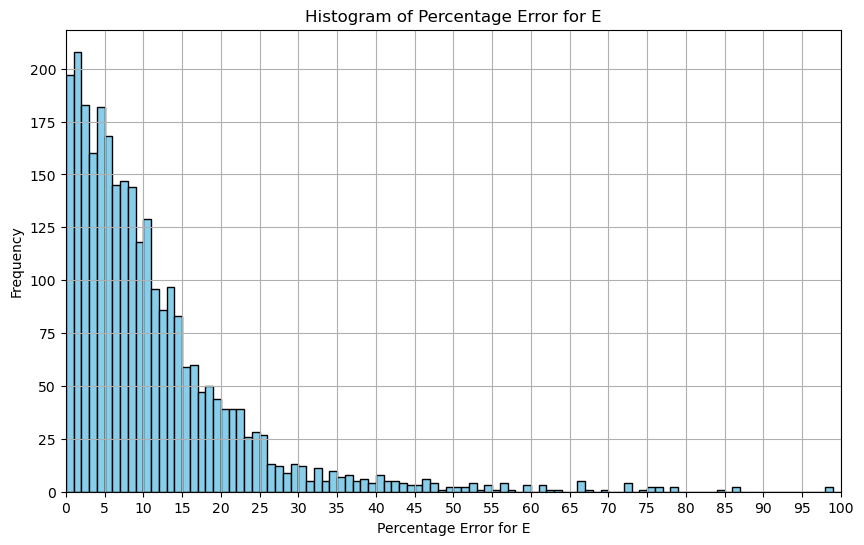

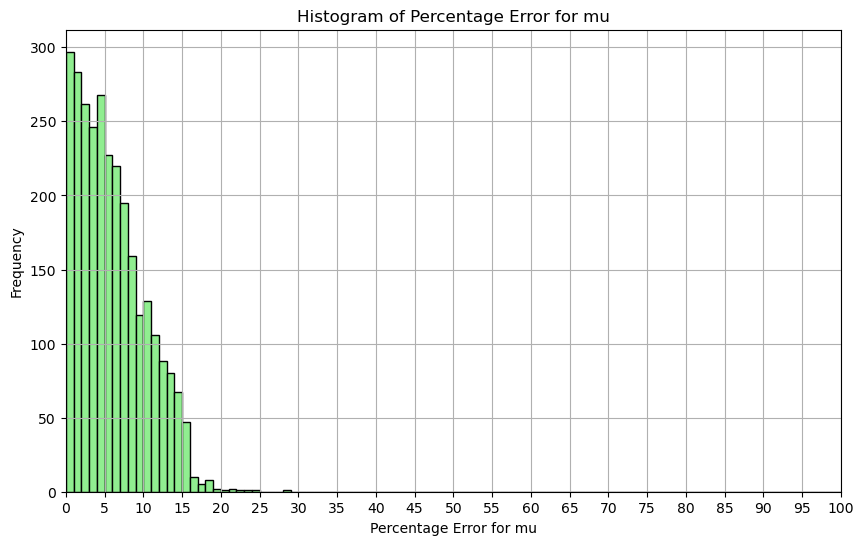

Maximum Percentage Error for E: 659.1845194498699
Minimum Percentage Error for E: 0.012752952527468112
Maximum Percentage Error for mu: 28.38724210117403
Minimum Percentage Error for mu: 0.0036234445701357467


In [24]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101,5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [25]:
import pickle

In [26]:
model_file_pickle = "polymerss_ANN_model_scale_cuboid.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [27]:
model_file_pickle = "polymerss_ANN_model_scale_cuboid.pkl"
with open(model_file_pickle, 'rb') as file:
    model1 = pickle.load(file)

In [28]:
y_pred = model1.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
y_pred_loaded_pickle

NameError: name 'y_pred_loaded_pickle' is not defined

In [ ]:
# Predictions on the test set
from scipy import stats

# y_pred  = model1.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0]*100 - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 100
results_df['Predicted_E'] /= 100
results_df['Error_E'] /= 100
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101,5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')